## Applied Machine Learning 1: includes exercises on linear regression and Naive Bayes classification

### Import packages

In [2]:
import os
import platform
import sys
import sklearn
import numpy as np
np.random.seed(260393)
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

import warnings 
warnings.filterwarnings('ignore')

print("All packages imported!")
print("python=={}".format(platform.python_version()))
print("seaborn=={}".format(sns.__version__))
print("scikit-learn=={}".format(sklearn.__version__))
print("pandas=={}".format(pd.__version__))
print("numpy=={}".format(np.__version__))
print("matplotlib=={}".format(mp.__version__))

# You should see this output:
# All packages imported!
# python==3.7.6
# seaborn==0.11.1
# scikit-learn==0.23.2
# pandas==1.1.4
# numpy==1.19.4
# matplotlib==3.2.2

All packages imported!
python==3.7.6
seaborn==0.11.1
scikit-learn==0.23.2
pandas==1.1.4
numpy==1.19.4
matplotlib==3.2.2


\pagebreak

# Part 1 Linear Regression

### House Prices Dataset

The aim of this task is to predict house prices in Melbourne, Victoria, Australia using Linear Regression. The dataset consists of [historic data of houses sold over several years](https://www.kaggle.com/anthonypino/melbourne-housing-market).


***Attribute description:***

- Suburb: Suburb
- Address: Address
- Rooms: Number of bedrooms
- Price: Price in Australian dollars
- Method: sale method (we won't use this)
- Type: h (house), u (apartment), t (townhouse)
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from Central Business District in kilometres
- Regionname: General Region
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size in Sq. Metres
- BuildingArea: Building Size in Sq. Metres
- YearBuilt: Year the house was built
- CouncilArea: Governing council for the area
- Lattitude: Latitude
- Longtitude: Longitude


\pagebreak

# ========== 1.1 ==========

(1) How do regression and classification tasks differ in Machine Learning? Give an example of each.

(1) ***Answer***

Regression and classification are both supervised machine learning tasks that differ in terms of what they are trying to predict. In regression the target is a numeric value, whereas in classification the target is a category / class. In other words, in regression the target variable is continuous, whereas in classification the target variable is discrete.

An example of a regression task is trying to predict the annual salary of a population based on the level of education using historic data of annual salaries and different levels of education.
An example of a classification task is digit classification where we are given a dataset of images of hand written digits and we need to label them by recognising which digit they represent.

(2) Read in the Melbourne housing data and name it ***aushouse***. Use functions to describe the dataset.

In the cells below, we read in the data set, use functions to describe it and also do some preprocessing to inspect and visualise the data.

In [3]:
#(2) 
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'Melbourne_housing.csv')
aushouse = pd.read_csv(data_path, delimiter=',')

# Display number of data points and number of attributes
print('Number of data points in aushouse data set: {}'.format(aushouse.shape[0]))
print('Number of attributes in aushouse data set: {}'.format(aushouse.shape[1]))

# Display also the first 5 data points
pd.set_option('display.max_columns', None)
aushouse.head(5)

Number of data points in aushouse data set: 34857
Number of attributes in aushouse data set: 21


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# Display a summary of our dataset to check what type of values each attribute takes
aushouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
# Convert attributes that are object type to categorical. 
# Convert also Postcode which is treated as 'float64' but should be treated as categorical
cat = aushouse.select_dtypes(include='O').columns
aushouse[cat] = aushouse[cat].astype('category')
aushouse['Postcode'] = aushouse['Postcode'].astype('category')

# The dataset has a mixture of categorical and numeric data so we will display the descriptive statistics separately
# Descriptive statistics for numeric data
aushouse.describe(include=np.number)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,1965.284097,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,37.313335,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2019.000000,-37.390200,145.526350,21650.000000


In [6]:
# Descriptive statistics for categorical data
aushouse.describe(include=['category'])

,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34856.0,34854,34854
unique,351,34009,3,9,388,78,211.0,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,3073.0,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,844.0,3675,11836


In [7]:
# Check the share of data points that are missing from each attribute
nanvals = aushouse.isna().sum(axis=0).values/aushouse.shape[0]*100
pd.DataFrame(data=nanvals.reshape(1,aushouse.shape[1]), 
             columns=aushouse.columns, index=['Missing (% of total)'])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Missing (% of total),0.0,0.0,0.0,0.0,21.832057,0.0,0.0,0.0,0.002869,0.002869,23.573457,23.599277,25.039447,33.881286,60.576068,55.386293,0.008607,22.882061,22.882061,0.008607,0.008607


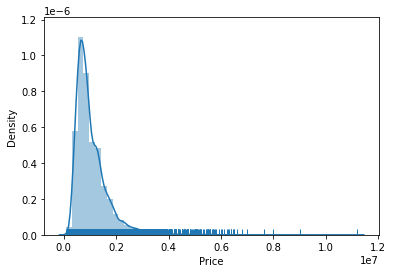

In [8]:
# Display a histogram for Price to visualise the distribution of values
sns.distplot(aushouse['Price'], rug=True)
plt.show()

(3) Comment on the characteristics of the attributes just displayed, including where data might be missing. Describe two different strategies for dealing with the missing data.

(3) ***Answer***

There are 21 attributes in total in this dataset, 8 categorical and 13 numeric. The attribute `Postcode` is read in initially as numeric but is converted as categorical as its values have no real numeric meaning (can't be added, multiplied, compared etc). All numeric attributes are floating type except for Rooms which is integer type. Looking at the `Price` attribute and how it is described, its mean value is $1\cdot 10^6$  and its standard deviation is $6.4 \cdot 10^5$ which is quite high. 75% of `Price` data fall under $1.3 \cdot 10^6$ and the max value is at $1.12 \cdot 10^7$. Looking also at the histogram of `Price` values, we verify that the majority of values are in the range $0 - 0.4 \cdot 10^6$ but there are some extreme values which could affect our analysis. 

The total number of instances are 34857. Looking at the counts (number of instances) for each column, there are many attributes with missing values. The only attributes that don't have missing values (and therefore values for all 34857 instances) are: `Suburb, Address, Rooms, Type, Method, SellerG, Date`. It is important to note that the `Price` attribute, which will be our target variable, also has missing instances. The attributes with the most missing values are `BuildingArea` and `YearBuilt`. These attributes have missing values for ~55% and ~60% of the total datapoints respectively, which shows that it might be good to remove these columns from the dataset before fitting our model.

In terms of dealing with the missing data, it depends on the meaning of the missing data and if there is any significance in the fact that a value is missing. Two different strategies of dealing with missing data are:
1. Remove instances with missing data. This will ensure that we end up with a dataset with no NaN (missing) values but it will reduce the size of our dataset.
2. Replace instances with missing data with either the attribute mean or median (if numeric feature) or the most frequent attribute value (if categorical feature). This will result in our dataset not changing in size. However, replacing with the mean/median will not always be appropriate. For example replacing missing `Price` values with the mean will have an effect on our linear model which might not be what we want.

An alternative way of dealing with data is doing a combination of the above two strategies. For example deleting instances with missing `Price` values and then for the remaining attributes with missing values, fill these with the attribute mean or median.

\pagebreak

# ========== 1.2 ==========

(1) One feature that could well be important in predicting price is the Type of property (house, apartment or townhouse).  What type of feature is this, and why can't we use it in linear regression?  Describe a method for using information from this type of feature in linear regression (6)

(1)  ***Answer***

`Type` of property is a categorical feature which takes values h=house, u=apartment, t=townhouse. Categorical features can't be used in linear regression unless converted to numerical form because you cannot perform arithmetic operations with categorical data. The values (h,u,t) could be converted to numerical form (1,2,3) in order to be used in linear regression but this could create problems as there is a natural ordering in (1,2,3) and a linear regression model could learn and use this ordering to learn properties that are not meant to be learnt.

To overcome this issue with categorical features, we will use one-hot encoding. In one-hot encoding every unique category value is represented in the dataset as a new attribute taking binary values (0 or 1 depending on if it is present or not present). By performing one-hot encoding in the `Type` attribute we will result with three binary attributes one for each `Type` category (`h, t, u`).

(2) Convert the Type feature using the method you described above (if they used a different method, if you can easily see if their code matches their method then give them marks for it). Remove features which cannot be used for linear regression, and the YearBuilt feature which we won't use, and show a correlation heatmap with values

In [9]:
# (2) 
# Make a copy of the aushouse dataset
aushouse_clean = aushouse.copy()

# Convert the Type feature using one-hot encoding
type_1hot = pd.get_dummies(aushouse['Type'])
aushouse_clean = pd.concat([aushouse_clean.drop(['Type'], axis=1), type_1hot], axis=1)

# Drop the features YearBuilt, Method which are specified that we won't use
# Method is the sale method and it is mentioned that we won't use it in the attribute description in the introduction
aushouse_clean.drop(['YearBuilt','Method'], axis=1, inplace=True)

# Drop the other categorical features that can't be used in linear regression
aushouse_clean.drop(labels=aushouse_clean.select_dtypes(include='category').columns, axis=1, inplace=True)

# Drop the feature BuildingArea which has more than 60% of values missing
aushouse_clean.drop(['BuildingArea'], axis=1, inplace=True)

# Display the number of attributes in the clean dataset
print('Number of attributes in clean dataset: {}'.format(aushouse_clean.shape[1]))

Number of attributes in clean dataset: 13


The correlation heatmap with values is included in the following question Q 1.3 (1).

\pagebreak

# ========== 1.3 ========== 

(1) Show a correlation heatmap with values.

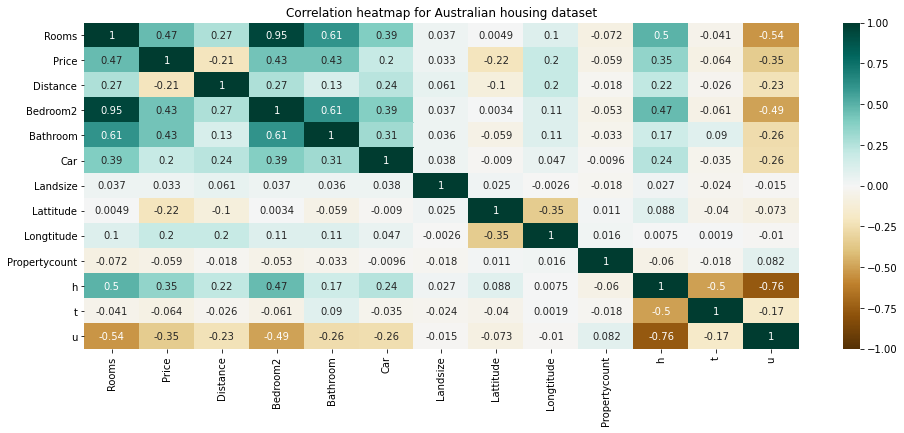

In [10]:
# (1)
# Plot a correlation heatmap for all attributes of the clean dataset
# We use the Pearson correlation coefficient for calculating coefficients between all variables
plt.figure(figsize=(16,6))
hmap = sns.heatmap(aushouse_clean.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
hmap.set_title('Correlation heatmap for Australian housing dataset')
plt.show()

(2) Comment on what you see in the correlation heatmap values, with regard to this task.  Which features could you drop, and why?

(2) ***Answer***

Correlation coefficients give an indication of the level of correlation between two variables. Correlation coefficient values range from -1 to 1, with 1 and -1 indicating perfect positive and negative correlation respectively and 0 indicating no correlation between two variables. In this case we use the Pearson correlation coefficient which is used as a measure of linear correlation.

On the correlation heatmap we firstly look at the correlation of all features with `Price` (the target variable). We see that there are a number of features with low correlation values with `Price`: `Landsize, Propertycount, t`. These three features have overall lower correlation coefficient values with `Price` compared to the other features (lower than 0.1). This indicates that there is probably not a strong relationship between these features and `Price`.

Dropping features could depend on the correlation threshold that we set. Considering a threshold value of 0.1 we would drop the features: `Landsize, Propertycount, t`. However, the feature `t` is a feature that was created after one-hot encoding feature `Type` and if we remove it, we would remove a part of that feature while keeping its two other categories (h, u). We will therefore not drop feature `t` even though it shows to have a low correlation with `Price`, because it completes feature `Type` together with `h` and `u` . We will however drop features `Landsize` and `Propertycount` which show low correlation with `Price`.

We also notice that features `Rooms` and `Bedroom2` have a correlation of 0.95 which is very close to 1, so they provide almost identical information. We can remove this redundancy by dropping one of the two.
We verify this also by observing the values these two features take. We will drop the feature `Bedroom2` which has a lower correlation coefficient with `Price` compared to `Rooms` (Rooms-Price:0.47, Bedroom2-Price:0.43).

(3) Drop the features you have identified, and remove any instances with missing attribute values.

In [11]:
# (3)
# Verify which features have correlation with Price less than 0.1
aushouse_cor = aushouse_clean.corr()['Price']
print('Features with correlation coefficients lower than 0.1: {}'
      .format(aushouse_cor[aushouse_cor.abs() < 0.1].index.values))

Features with correlation coefficients lower than 0.1: ['Landsize' 'Propertycount' 't']


In [12]:
# Observe data for features Rooms and Bedroom2 and verify that they are similar
aushouse_clean[['Rooms','Bedroom2']]

,Rooms,Bedroom2
0,2,2.0
1,2,2.0
2,2,2.0
3,3,3.0
4,3,3.0
...,...,...
34852,4,4.0
34853,2,2.0
34854,2,2.0
34855,3,NaN


In [13]:
# Drop features Landsize and Propertycount which have correlation coefficient values with Price <0.1
dropfeat = ['Landsize', 'Propertycount']
aushouse_clean.drop(dropfeat, axis=1, inplace=True)

# Drop feature Bedroom2 as it similar to Rooms
aushouse_clean.drop(['Bedroom2'], axis=1, inplace=True)

# Remove instances with missing attribute values
aushouse_clean.dropna(axis=0, inplace=True)

# Display the number of data points and number of attributes in the clean dataset
print('Number of data points in clean dataset: {}'.format(aushouse_clean.shape[0]))
print('Number of attributes in clean dataset: {}'.format(aushouse_clean.shape[1]))

Number of data points in clean dataset: 20401
Number of attributes in clean dataset: 10


After dropping the features we have identified as not useful for this task and also after removing missing attribute values, we also check the dataset for any obvious outliers. Outliers could have an impact on the performance of our linear regression model.

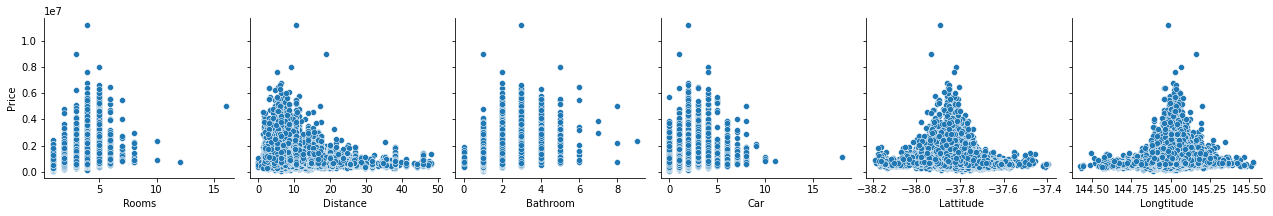

In [14]:
# Visualise the dataset to check for any outliers
g = sns.pairplot(data=aushouse_clean, y_vars=['Price'], 
                 x_vars=['Rooms', 'Distance', 'Bathroom', 'Car', 'Lattitude', 'Longtitude'], 
                 height=3)

Visualising the data, helps us identify any obvious outliers in the data. The attributes with the most obvious extreme data points are `Price` (our target variable) and `Rooms`. 
From the scatterplots we see that most `Price` values are below $0.6 \cdot 10^7$ but there a few price values that are higher than this. This matches with what we had observed in the beginning in Question 1.1 by looking at the histogram of `Price` values. We will remove instances with `Price` values over $0.6 \cdot 10^7$. <br>
From the scatterplot we also see that most `Room` values are below 10 but there are some instances with rooms over 10 and one extreme point with 16 rooms. We will remove instances with `Room` values 10 or more. 

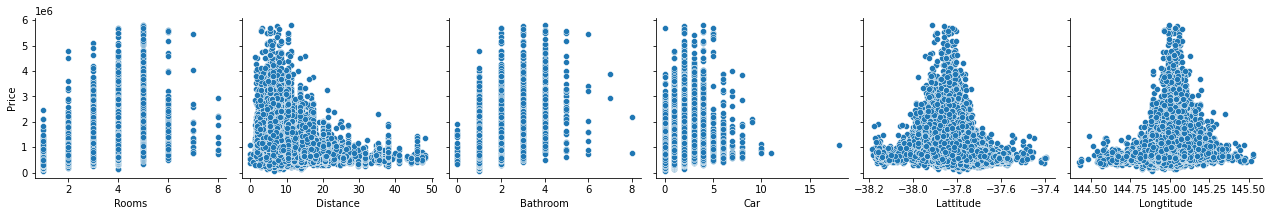

In [15]:
# Remove outliers: prices that are over 0.6x10^7 and rooms over 10
aushouse_clean = aushouse_clean[aushouse_clean['Price']<0.6e7]
aushouse_clean = aushouse_clean[aushouse_clean['Rooms']<10]

# Visualise again the dataset after removing the outliers
g = sns.pairplot(data=aushouse_clean, y_vars=['Price'], 
                 x_vars=['Rooms', 'Distance', 'Bathroom', 'Car', 'Lattitude', 'Longtitude'], 
                 height=3)

In [16]:
# Display the final number of data points and attributes in the clean dataset
print('Number of data points in clean dataset: {}'.format(aushouse_clean.shape[0]))
print('Number of attributes in clean dataset: {}'.format(aushouse_clean.shape[1]))

Number of data points in clean dataset: 20383
Number of attributes in clean dataset: 10


\pagebreak

# ========== 1.4 ==========

(1) Create ***X*** and ***y*** from <html><var>aushousing</var></html> and then use train_test_split to create training and test set, with the testing set being 20% of the entire data. Set the random_state to 0 for reproducibility.

In [17]:
#(1)
# Create X and y from the clean aushouse dataset
X = aushouse_clean.drop(['Price'], axis=1).values
y = aushouse_clean['Price'].values
X_columns = aushouse_clean.drop(['Price'], axis=1).columns # Keep names of columns

# Split the dataset in training and test set with the test set being 20% of the entire data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the split of the dataset in training and test sets 
print('Number of instances in X set: {}'.format(X.shape[0]))
print('Number of instances in X_train set: {}'.format(X_train.shape[0]))
print('Number of instances in X_test set: {}'.format(X_test.shape[0]))
print('Number of instances together in X_train and X_test set: {}'.format(X_train.shape[0]+X_test.shape[0]))

Number of instances in X set: 20383
Number of instances in X_train set: 16306
Number of instances in X_test set: 4077
Number of instances together in X_train and X_test set: 20383


(2) Fit a LinearRegression to the training set, print the intercept and a DataFrame showing the coefficient of each attribute.

In [18]:
#(2)
# Fit a LinearRegression model to the training set
reg = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
reg.fit(X_train, y_train)

# Display the intercept
print('Intercept: {:.3f}'.format(reg.intercept_))

# Display a DataFrame with the coefficient of each attribute
coefDF = pd.DataFrame(data=reg.coef_.reshape(1,X_train.shape[1]), columns=X_columns, index=['coef'])
coefDF

Intercept: -184602218.237


,Rooms,Distance,Bathroom,Car,Lattitude,Longtitude,h,t,u
coef,168042.330877,-44533.188648,221946.664726,39915.775988,-1.587037e+06,863039.657907,224295.676395,-99586.387595,-244837.815202


(3) Describe the meaning of the intercept and the coefficients. Comment on the coefficients, including their size, and what they tell us about the relationship between the features and the price.  Which house properties affect the price most?  Does the type of property matter much?

(3) ***Answer***

The intercept is also known as the independent term and is where the fitted line intersects with the y axis. In a simple linear fit of $y = bx + a$, the constant $a$ is the intercept. The intercept has same units as the target variable. In our case the intercept is negative which means that our linear regression model crosses the y-axis in the negative side. If the intercept didn't exist ($a = 0$), then the fitted line would have to go through the origin (0,0) resulting in a bad fit.

The coefficients give an indication of the relationship between each feature and the target variable, the price. They are also known as the feature weights. Positive coefficients show that an increase in that feature will result in an increase in price and negative coefficients show that an increase in that feature will result in  a decrease in price (while keeping other features constant). The absolute value of each coefficient gives an indication of how much a feature affects the price (if keeping other features constant).

It is important to note that we can compare coefficients because we have normalised the training data when fitting our model (by setting `normalize=True` in our `LinearRegression` model). Normalising the data means scaling them to have unit norm. The absolute value of each coefficient can only be interpreted as an indication of feature importance (how much it affects the target variable) if all features are normalised. 

The attributes with largest coefficients (absolute values) and therefore the house properties that mostly affect price are: `Lattitude`, `Longtitude`, Type (`h, t, u`), `Bathroom` (number of bathrooms) and `Rooms` (number of bedrooms). Lattitude and Longtitude indicate the property's location. This makes sense to affect the price the most as there could be areas with higher/lower value properties. The type of property (whether the property is a house, apartment or townhouse) also matters a lot. The coefficients show that if the property is a house or townhouse (`h, t`) then this affects the price upwards (positive coefficient), whereas if the property is an apartment (`u`), then this affects the price downwards (negative coefficient).

\pagebreak

# ========== 1.5 ==========

(1) Print the Root Mean Squared Error (RMSE) and <html><var>R<sup>2</sup></var></html>.

In [19]:
# (1)
# Predict on the training set
training_pred = reg.predict(X=X_train)

# Calculate and display the Root Mean Squared Error (RMSE) and R2 in the training set
print('Root Mean Squared Error (RMSE) in training set: {:.3f}'.format(mean_squared_error(y_train, training_pred, squared=False))) 
print('Accuracy score R2 in training set: {:.3f}'.format(r2_score(y_train, training_pred)))

Root Mean Squared Error (RMSE) in training set: 429370.992
Accuracy score R2 in training set: 0.536


In [20]:
# Predict on the test set
test_pred = reg.predict(X=X_test)

# Calculate and display the Root Mean Squared Error (RMSE) and R2 in the test set
print('Root Mean Squared Error (RMSE) in test set: {:.3f}'.format(mean_squared_error(y_test, test_pred, squared=False))) 
print('Accuracy score R2 in test set: {:.3f}'.format(r2_score(y_test, test_pred)))

Root Mean Squared Error (RMSE) in test set: 445927.688
Accuracy score R2 in test set: 0.532


(2) Explain the meaning and output of the RMSE and <html><var>R<sup>2</sup></var></html>. What do they tell us about the fit of the data?

(2) ***Answer***

RMSE and $R^2$ are both evaluation metrics for linear regression and give an indication of how good the fit of the model is to the data, in other words measuring how far the model's predictions are from the actual values. MSE (mean squared error) is also the loss function which the linear regression model tries to minimise in order to find the best fit to the data.

RMSE is the root MSE (mean squared error) which measures the average squared errors between predicted and actual values. It is a measure of the quality of the predictions and the prediction error, however it is sensitive to mean/scale and outliers. In general, a small RMSE would indicate that the predictions are closer to the actual values, however since RMSE has the same units as the quantity being predicted its values are also affected by the scale of the target variable. In our case RMSE is ~$0.43 \cdot 10^6$ in the training set and ~$0.44 \cdot 10^6$ in the test set which means our predictions have an average distance of ~$0.43 \cdot 10^6$ and ~$0.44 \cdot 10^6$ from the actual values in the training and test set respectively. Considering that the mean of Price values in our final clean dataset is $1 \cdot 10^ 6$, this RMSE shows that we have a relatively good fit.

$R^2$ is the coefficient of determination defined as $R^2=1 - {SS}_{res} / {SS}_{tot}$ where ${SS}_{res}$ is the sum squares of residuals and ${SS}_{tot}$ is total sum of squares. It is another metric of how well the linear model fits to the actual values. The closer $R^2$ is to 1 the better the fit. An $R^2$ of 0 represents the baseline model which always predicts the mean. An $R^2$ that is negative represents a linear fit that is worse than the baseline.
This metric is useful because it is insensitive to mean/scale. In our case $R^2$ is ~0.53 in both the training and test set which shows that we have a relatively good fit but not a perfect fit.

Comparing these two evaluation metrics between the training and the test set gives an indication of whether our model is overfitting and how well our model generalises. RMSE and $R^2$ have overall worse values in the test set (higher RMSE and lower $R^2$ in the test set compared to RMSE and $R^2$ in the training set), however they are very close to the scores in the training set. This shows that our model is not overfitting and is generalising well in unseen data (the test set).

__The part below is not related to Q 1.5 (2). It is an extra step that we have tried, to improve the fit of the linear model.__ <br>
Based on the scatterplots produced in Q 1.3 (3) the feature `Distance` shows a right skewed distribution. We transform it by taking its log, which is a common transformation (as mentioned in the lectures) and is also suitable here because it is a numeric feature with a distribution skewed towards lower values. Taking its log will transform it towards a more normal distribution. To avoid any problems with zero values transformed to $-\infty$ we also add a small value when performing the log transformation.

In [21]:
# Take a copy of the aushouse clean dataset
aushouse_clean2 = aushouse_clean.copy()

# Perform log transformation to the Distance feature adding also a small value to handle log(0)
logdistance = np.log(aushouse_clean2['Distance'] + 1)
aushouse_transform = pd.concat([aushouse_clean2.drop(['Distance'], axis=1), logdistance], axis=1)

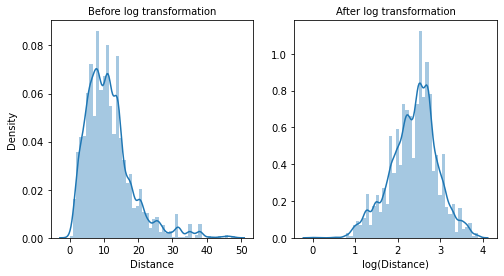

In [22]:
# Plot the distribution of the Distance feature before and after transformation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

sns.distplot(aushouse_clean['Distance'], ax=ax1)
ax1.set_title('Before log transformation', size=10)
sns.distplot(aushouse_transform['Distance'], ax=ax2)
ax2.set_title('After log transformation', size=10)
ax2.set_xlabel('log(Distance)')
ax2.set_ylabel('')
plt.show()

In [23]:
# Create X and y from the transformed aushouse dataset
X = aushouse_transform.drop(['Price'], axis=1).values
y = aushouse_transform['Price'].values

# Split in training and test set and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
reg.fit(X_train, y_train)

# Predict on the training set
training_pred = reg.predict(X=X_train)

# Calculate and display the Root Mean Squared Error (RMSE) and R2 in the training set
print('Root Mean Squared Error (RMSE) in training set: {:.3f}'.format(mean_squared_error(y_train, training_pred, squared=False))) 
print('Accuracy score R2 in training set: {:.3f}'.format(r2_score(y_train, training_pred)))

# Predict on the test set
test_pred = reg.predict(X=X_test)

# Calculate and display the Root Mean Squared Error (RMSE) and R2 in the test set
print('Root Mean Squared Error (RMSE) in test set: {:.3f}'.format(mean_squared_error(y_test, test_pred, squared=False))) 
print('Accuracy score R2 in test set: {:.3f}'.format(r2_score(y_test, test_pred)))

Root Mean Squared Error (RMSE) in training set: 434700.514
Accuracy score R2 in training set: 0.524
Root Mean Squared Error (RMSE) in test set: 451005.382
Accuracy score R2 in test set: 0.521


We observe that taking the log transformation of the Distance feature has transformed its distribution into a normal one. However, this has not had an impact to the model's performance. Based on the RMSE and $R^2$ results on the training and test set, we see that the performance of the model has not been improved by taking the log transformation of the Distance feature. In fact, RMSE is slightly higher and $R^2$ slighlty lower in the test set compared to results in Q1.5. 

\pagebreak

# Part 2 Naive Bayes

### Income dataset

The aim of this task is to predict whether a United States person has income over \$50,000. The dataset is derived from the [1994 US census data](https://archive.ics.uci.edu/ml/datasets/Adult).

***Attribute description:***

attributes in _italics_ are ones we will not use

- _age: age in years_
- work: working status
- _fnlwgt: weighting factor_
- edu: education level
- _edunum: years of education_
- marit: marital-status
- occ: occupation
- rel: relationship status
- race: race.
- sex: sex
- _cg: capital-gains_
- _cl: capital-losses_
- _hours: hours of work per week_
- over50k: income over $50,000


\pagebreak

# ========== 2.1 ==========

(1) Why is the Naive Bayes method called that?  What is "naive" about it and what is Bayesian about it?

***Answer***

The Naive Bayes method is a classification method which is based on using Bayes rule to calculate the probability of a class given a set of observations. What is Bayesian about it is that it is a probabilistic classification method that makes use of Bayes rule. What is "naive" about it is the fact that it assumes conditional independence between the features given a specific class. 

(2) Read in the income data (income.csv) and name it income.  Remove attributes we won't use (in _italics_ in the list above), and remove instances with missing data.

In [24]:
#(2)
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'income.csv')
income = pd.read_csv(data_path, delimiter=',')

# Display number of data points and number of attributes
print('Number of data points in income set: {}'.format(income.shape[0]))
print('Number of attributes in income set: {}'.format(income.shape[1]))

Number of data points in income set: 32561
Number of attributes in income set: 15


In [25]:
# Display the first 5 data points
income.head(5)

,age,work,fnlwgt,edu,edunum,marital,occ,rel,race,sex,cg,cl,hours,nat,over50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [26]:
# Display descriptive statistics for the whole dataset
income.describe(include='all')

,age,work,fnlwgt,edu,edunum,marital,occ,rel,race,sex,cg,cl,hours,nat,over50k
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [27]:
# Remove attributes we won't use: age, fnlwgt, edunum, cg, cl, hours
income.drop(['age', 'fnlwgt', 'edunum', 'cg', 'cl', 'hours'], axis=1, inplace=True)

# Remove instances with missing data
income.dropna(axis=0, inplace=True)

# Display number of datapoints and attributes after removing attributes and instances with missing data
print('Number of data points in income set: {}'.format(income.shape[0]))
print('Number of attributes in income set: {}'.format(income.shape[1]))

Number of data points in income set: 32561
Number of attributes in income set: 9


(3) Use a library function to show the attributes, their type, and how many there are of each.

In [28]:
#(3)
# Display the attributes, their type and how many instances there are with no missing values
income.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   work     32561 non-null  object
 1   edu      32561 non-null  object
 2   marital  32561 non-null  object
 3   occ      32561 non-null  object
 4   rel      32561 non-null  object
 5   race     32561 non-null  object
 6   sex      32561 non-null  object
 7   nat      32561 non-null  object
 8   over50k  32561 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 2.5+ MB


The above table shows that we have 7 attributes that are categorical (`work, edu, marital, occ, rel, race, sex, nat`) and 1 numeric (integer), which is our target variable `over50k`. There are no missing instances as all attributes have 32561 values.

(4) We'll use the integer attribute as the class to predict.  How many classes are there, and what integer values to they have?

In [29]:
#(4)
# The integer attribute is 'over50k': class to predict
# Display the number of classes and what integer values they have
unique_vls = np.unique(income['over50k'])
nr_vals = len(unique_vls)
print('The target class {} has {} classes with values: {}'.format('over50k', nr_vals, unique_vls))

# Display the number of instances in each class
print('The target class {} has {} instances with value {} and {} instances with value {}'.
      format('over50k', income[income['over50k']==0].shape[0], 0, income[income['over50k']==1].shape[0], 1))

The target class over50k has 2 classes with values: [0 1]
The target class over50k has 24720 instances with value 0 and 7841 instances with value 1


Use another library function to show details about each of the other attributes (the features), including the frequency of the most prevalent category.

In [30]:
#(5)
# Extract the features from the income dataset
features = income.drop(['over50k'], axis=1)

# Set features as categorical type
features = features.astype('category')

# Display the descriptive statistics for all features
features.describe(include='category')

,work,edu,marital,occ,rel,race,sex,nat
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In the above table, 'count' indicates the number of instances in each feature, 'unique' indicates the number of unique values, 'top' indicates the most prevalent category for each feature and 'freq' indicates the frequency of the most prevalent category.

\pagebreak

# ========== 2.2 ==========

(1) List the feature names. 

In [31]:
#(1)
# List the feature names
featnames = features.columns.values
print('The feature names are: {}'.format(featnames))

The feature names are: ['work' 'edu' 'marital' 'occ' 'rel' 'race' 'sex' 'nat']


(2) Use seaborn functions to show a bar chart for each of the features of the number of instances with each attribute value, with distinct counts for each target class shown side by side.

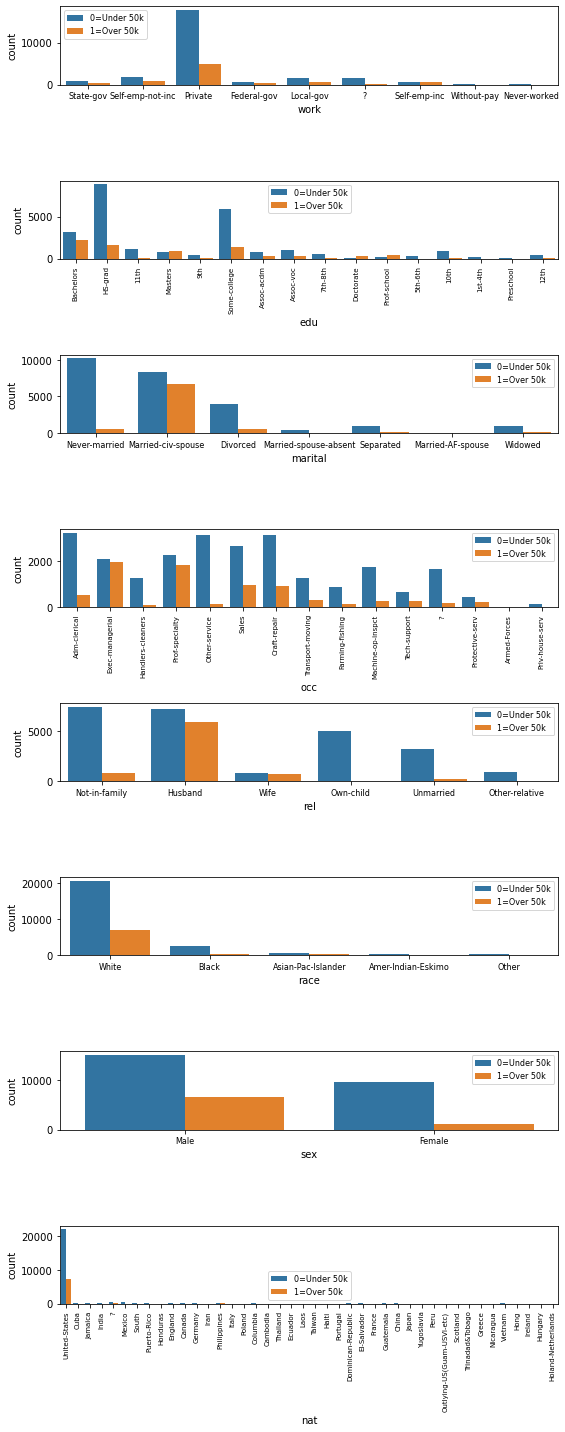

In [32]:
#(2)
# Display a bar chart for each of the features of the number of instances with each attribute value
n_feats = len(featnames)
fig, axs = plt.subplots(n_feats, 1, figsize=(8,20))

for i, feature in enumerate(featnames):
    plt.subplot(n_feats, 1, i+1)
    sns.countplot(x=feature, data=income, hue='over50k')
    plt.xticks(fontsize=8)
    plt.legend(labels=['0=Under 50k','1=Over 50k'], fontsize=8)
    if feature in ['nat', 'edu', 'occ']:
        plt.xticks(fontsize=7, rotation=90)
plt.tight_layout()
plt.show()

(3) Comment on the plots you've created.  Are there rare categories? Do the features look like they will be good for the classification task 

***Answer***

We see that across all attributes there are some category values that are more dominant than others. For example in the `work` attribute the value 'Private' is much more common than the others and values 'Without Pay' and 'Never worked' are very rare. <br>
We also see that instances of the target class (`over50k`) are not balanced between categories. For example, looking at the Relationship status attribute `rel`, the values for 'Husband' and 'Wife' are relatively equally split between those achieving over 50k and those achieving under 50k. On the other hand for those 'Not in family' the vast majority doesn't achieve over 50k. <br>
Overall, the target class 0 (under 50k) is dominant across all feature values and instances of class 1 (over 50k) are much rarer across features. The class imbalance distribution which is present in all features could be a challenge for the classification task, however it is not so extreme so we would expect a classifier model to still be able to learn characteristics of the non-dominant class and perform well. This means that although feature values show an imbalance towards one class, we would still expect them to be good for the classification task.

\pagebreak

# ========== 2.3 ==========

(1) Set ***target_encoded*** to be the array of class values, and show the values for ten of the instances.

In [33]:
#(1)
# Set the array of class values
target_encoded = income['over50k'].values

# Display the values for the first 10 instances
target_encoded[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

(2) Use OrdinalEncoder to transform the categorical feature values to numeric values

In [34]:
#(2)
# Transform the categorical feature values to numeric values using OrdinalEncoder
# Transform into integer values
enc = OrdinalEncoder(dtype=np.int64)
enc.fit(features.values)
features_encoded = enc.transform(X=features.values)

Although our categorical features don't have ordinal characteristics, the OrdinalEncoder helps to transform the feature values into numeric form. Each feature is represented by a value of 0..n-1 where n is the number of discrete categories for that feature. For example the feature `work` takes 9 unique values so we expect its values to range from 0 to 8.

(3) Store the encodings in a data frame called income_encoded.  Show the feature values for the first five instances. 

In [35]:
#(3)
# Store feature encodings in a new dataframe
income_encoded = pd.DataFrame(data=features_encoded, columns=features.columns, index=features.index)

# Display feature values for the first 5 instances
income_encoded.head(5)

,work,edu,marital,occ,rel,race,sex,nat
0,7,9,4,1,1,4,1,39
1,6,9,2,4,0,4,1,39
2,4,11,0,6,1,4,1,39
3,4,1,2,6,0,2,1,39
4,4,9,2,10,5,2,0,5


In [36]:
# Also verify the encoding of features by looking at the descriptive statistics of income_encoded
income_encoded.describe()

,work,edu,marital,occ,rel,race,sex,nat
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.868892,10.298210,2.611836,6.572740,1.446362,3.665858,0.669205,36.718866
std,1.455960,3.870264,1.506222,4.228857,1.606771,0.848806,0.470506,7.823782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000
50%,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000
75%,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000
max,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000


\pagebreak

# ========== 2.4 ==========

(1) Set ***X*** to be the data frame of independent variables, and ***y*** the array of dependent variables. Split the data into training and test sets using ***test_train_split***, with a testing fraction of 20%, and setting the random state to zero for consistency.

In [37]:
#(1)
# Extract data for classification
X = income_encoded.values
y = target_encoded

# Split the dataset in training and test set with the test set being 20% of the entire data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the split of the dataset in training and test sets 
print('Number of instances in X set: {}'.format(X.shape[0]))
print('Number of instances in X_train set: {}'.format(X_train.shape[0]))
print('Number of instances in X_test set: {}'.format(X_test.shape[0]))
print('Number of instances together in X_train and X_test set: {}'.format(X_train.shape[0]+X_test.shape[0]))

Number of instances in X set: 32561
Number of instances in X_train set: 26048
Number of instances in X_test set: 6513
Number of instances together in X_train and X_test set: 32561


(2) A simple baseline for classification tasks is to always predict the most common class in the training set (highest prior probability).  Print the class with the highest prior probability.  Create an array of predictions on the training set you just made, according to this baseline, and show the following performance statistics: number of missclassified instances, accuracy, F1, precision, recall.

In [38]:
#(2)
# Find and display the most common class in the training set
mostcommon = np.argmax(np.bincount(y_train))
print('The most common class in the training set is: {}'.format(mostcommon))

The most common class in the training set is: 0


In [39]:
# Create an array of predictions according to the baseline (most common class)
baseline_pred = np.full(y_train.shape, mostcommon)

# Show performance statistics for the baseline in the training set
print('The number of misclassified instances for the baseline predictor is: {:.0f}'
      .format(len(y_train)-accuracy_score(y_train, baseline_pred, normalize=False)))
print('Accuracy score for baseline: {:.3f}'.format(accuracy_score(y_train, baseline_pred)))
print('F1 score for baseline: {:.3f}'.format(f1_score(y_train, baseline_pred)))
print('Presision score for baseline: {:.3f}'.format(precision_score(y_train, baseline_pred)))
print('Recall score for baseline: {:.3f}'.format(recall_score(y_train, baseline_pred)))

The number of misclassified instances for the baseline predictor is: 6246
Accuracy score for baseline: 0.760
F1 score for baseline: 0.000
Presision score for baseline: 0.000
Recall score for baseline: 0.000


The default settings in `sklearn` when calculating the F1 score, precision score and recall score (shown above) assume that classes are binary (`average='binary'`) and that we are interested in how well our model can predict the positive class (assuming as positive class, class=1). In our case, this means that results are reported only for class 1=over50k. This is not the desired evaluation scheme: there are indeed two classes (0:under50k and 1:over50k), however there is no "positive" class, and we want to evaluate how well the model predicts both classes. We achieve this by reporting the performance scores (F1, precision, recall) with setting `average='macro'`, which calculates the metrics for each class separately and then finds their unweighted mean.

In [40]:
# Show performance metrics for the baseline predictor taking into account both classes
# Misclassified instances and accuracy score are not affected by this
print('Taking into account both classes (0=under50k, 1=over50k), the new performance metrics are:')
print('The number of misclassified instances for the baseline predictor is: {:.0f}'
      .format(len(y_train)-accuracy_score(y_train, baseline_pred, normalize=False)))
print('Accuracy score for baseline: {:.3f}'.format(accuracy_score(y_train, baseline_pred)))
print('F1 score for baseline: {:.3f}'.format(f1_score(y_train, baseline_pred, average='macro')))
print('Presision score for baseline: {:.3f}'.format(precision_score(y_train, baseline_pred, average='macro')))
print('Recall score for baseline: {:.3f}'.format(recall_score(y_train, baseline_pred, average='macro')))

Taking into account both classes (0=under50k, 1=over50k), the new performance metrics are:
The number of misclassified instances for the baseline predictor is: 6246
Accuracy score for baseline: 0.760
F1 score for baseline: 0.432
Presision score for baseline: 0.380
Recall score for baseline: 0.500


3. Create a confusion matrix between the training targets for the baseline predictor, and the normalised confusion matrix.  Display the confusion matrix.  Also display the normalised confusion matrix as an annotated heatmap. ***Hint:*** Use the plot_confusion_matrix function from the labs for the heatmap.

In [41]:
#(3)
# Create and display the confusion matrix
baseline_cm = confusion_matrix(y_train, baseline_pred)
print('The confusion matrix for the baseline predictor is: \n', baseline_cm)

The confusion matrix for the baseline predictor is: 
 [[19802     0]
 [ 6246     0]]


In [42]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

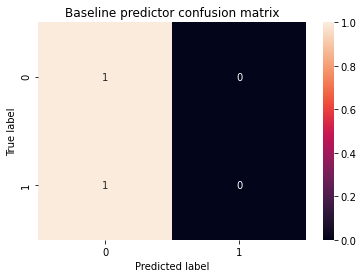

In [43]:
# Find and plot the normalised confusion matrix for the baseline predictor
baseline_cm_norm = baseline_cm / baseline_cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(baseline_cm_norm, classes=np.unique(y_train), title='Baseline predictor confusion matrix')

(4) Comment on what you see in the statistics from (2) and the confusion matrices in (3)

(4) ***Answer***

The baseline predictor performs well in terms of accuracy (76%), however this is not a suitable measure of 'goodness' as we have seen that our classes are imbalanced (we have more instances of class 0=under50k than class 1=over50k). Recall rate, precision rate and F1-score are more appropriate evaluation metrics in this case.<br>
The recall, precision rate and F1 scores when considering only class 1 are 0 as the number of True Positives (TP) is 0. The baseline predictor makes no predictions of class/label 1 and this is also evident in the confusion matrices (zeros for Predicted label 1). <br>
The recall, precision rate and F1 scores when considering both classes (`average='macro'`) are not zero. The recall rate is 50%, because it is the average of the recall rate for the two classes: 100% for class 0 and 0% for class 1. Similarly, the precision rate is 38%, the average of the precision rate for the two classes: 76% for class 0 and 0% for class 1. The F1 score is the harmonic mean of the recall and precision rate, which is why it is a value between the two, 43.2%. The difference in scores shows that the latter method of considering both classes (`average='macro'`) is the best way to report performance metrics for this classification task. <br>
Finally, the normalised confusion matrix has 1 for True Negatives which makes sense since the baseline only makes predictions for class 0.

\pagebreak

# ========== 2.5 ==========

(1) Train a categorical Naive Bayes model on the training data you made,and it's predictions on the same training data.

In [44]:
# (1)
# Fit a categorical Naive Bayes classifier on the training data
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

# Display the class log prior probabilities
print('Class log prior probabilities: {}'.format(cnb.class_log_prior_))

Class log prior probabilities: [-0.27415805 -1.42799973]


(2) Report the classifier's accuracy, precision and recall and F1 on the training dataset.  Also report the confusion matrix and the normalised confusion matrix for the result.

In [45]:
# (2)
training_pred = cnb.predict(X=X_train)

# Show performance statistics for the Categorical NB based on the training set
print('Accuracy score for CNB in training set: {:.3f}'.format(accuracy_score(y_train, training_pred)))
print('F1 score for CNB in training set: {:.3f}'.format(f1_score(y_train, training_pred, average='macro')))
print('Presision score for CNB in training set: {:.3f}'.format(precision_score(y_train, training_pred, average='macro')))
print('Recall score for CNB in training set: {:.3f}'.format(recall_score(y_train, training_pred, average='macro')))

Accuracy score for CNB in training set: 0.795
F1 score for CNB in training set: 0.745
Presision score for CNB in training set: 0.731
Recall score for CNB in training set: 0.776


In [46]:
# Create and display the confusion matrix for the CNB in the training set
training_cm = confusion_matrix(y_train, training_pred)
print('The confusion matrix for the CNB predictor in the training set is: \n', training_cm)

The confusion matrix for the CNB predictor in the training set is: 
 [[16087  3715]
 [ 1629  4617]]


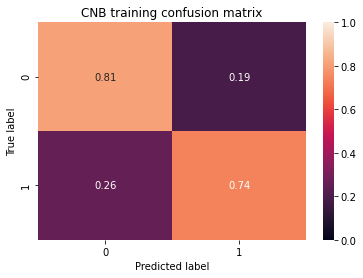

In [47]:
# Find and plot the normalised confusion matrix for the CNB predictor on the training set
training_cm_norm = training_cm / training_cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(training_cm_norm, classes=np.unique(y_train), title='CNB training confusion matrix')

3. Interpret the values of the accuracy, F1, precision and recall. Comment on the performance of the model, comparing to the baseline. Is the accuracy a reasonable metric to use for this dataset? Interpret the numbers in the confusion matrix. Does it look like you would expect to find in a "good" classifier?

***Answer***

The accuracy score in the CNB model is very close to the baseline which shows that accuracy is not a good metric here because classes are not balanced. Accuracy is calculated as the number of correctly classified instances divided by the total number of instances. Since our dataset has a lot more instances of class 0=under50k, it is trivial to achieve high accuracy rate by predicting class 0 all the time, which is what the baseline model does.

Recall rate, precision rate and F1-score are more appropriate metrics here. Recall rate gives the true positive rate (the proportion of actual positives that we correctly classified) and precision rate gives the proportion of predicted positives that were actual positives. The F1 score is the harmonic mean between recall and precision rates. <br>
Recall and precision scores are greatly improved in the CNB model compared to the baseline. The recall rate in the CNB classifier is ~77% compared to 50% in the baseline model and also, the precision rate in our CNB classifier is ~73% compared to 38% in the baseline. These both show that the CNB classifier is a lot better in correctly classifying the classes.

Also looking at the normalised confusion matrix, we see that the True Negative (TN) and True Positive (TP) numbers are high: 81% and 74% respectively. This shows that the CNB classifier is good at classifying the true instances on each class 0/1 (under 50k/over 50k). The baseline model was only good at classifying class 0 (the most common class). The False Negatives (FN) are slightly more than the False Positives (FP) - 26% and 19% respectively. This makes sense as there are more instances of class 0 so the CNB classifier is more biased towards that class. <br>
Overall, the results for the evaluation metrics (recall, precision, F1 score) and the results of the confusion matrix show that our CNB classifier works well on the training data. We now need to also assess the classifier's performance on unseen data, the test data. 

\pagebreak

# ========== 2.6 ==========

(1) Now evaluate the classifier on the testing data you made.  Report the classifier's accuracy, precision and recall and F1 on the testing dataset.  Also report the confusion matrix and the normalised confusion matrix for the result.

In [48]:
# (1)
test_pred = cnb.predict(X=X_test)

# Show performance statistics for the Categorical NB based on the test set
print('Accuracy score for CNB in test set: {:.3f}'.format(accuracy_score(y_test, test_pred)))
print('F1 score for CNB in test set: {:.3f}'.format(f1_score(y_test, test_pred, average='macro')))
print('Presision score for CNB in test set: {:.3f}'.format(precision_score(y_test, test_pred, average='macro')))
print('Recall score for CNB in test set: {:.3f}'.format(recall_score(y_test, test_pred, average='macro')))

Accuracy score for CNB in test set: 0.786
F1 score for CNB in test set: 0.737
Presision score for CNB in test set: 0.724
Recall score for CNB in test set: 0.766


In [49]:
# Create and display the confusion matrix for the CNB in the test set
test_cm = confusion_matrix(y_test, test_pred)
print('The confusion matrix for the CNB predictor in the test set is: \n', test_cm)

The confusion matrix for the CNB predictor in the test set is: 
 [[3957  961]
 [ 436 1159]]


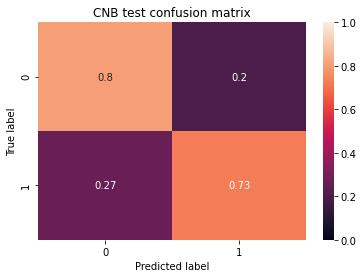

In [50]:
# Find and plot the normalised confusion matrix for the CNB predictor on the test set
test_cm_norm = test_cm / test_cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(test_cm_norm, classes=np.unique(y_test), title='CNB test confusion matrix')

(2) In a short paragraph (2-3 sentences) compare and comment on the results with the training data.

(2) ***Answer***

Results on the recall rate, precision rate and F1-score in the test set are slightly worse but overall very close to the scores on the training set. This is also verified by comparing the normalised confusion matrices between test and training set. The TP (true positive) and TN (true negative) rates are slightly lower in the test set compared to the training set (0.73 compared to 0.74 and 0.8 compared to 0.81 respectively) and the FP (false positive) and FN (false negative) rates are slightly higher (0.2 compared to 0.19 and 0.27 compared to 0.26 respectively). However, overall the model shows similar performance on the test set as in the training set. This shows that our CNB classifier is not overfitting and is generalising well on unseen data, the test set. 

 (3) Since the categorical data has been encoded as numbers, we could now train a GNB on the data.  Would you expect the GNB to perform better or worse than the CNB, and why?

(3) ***Answer***

We would expect the GNB classifier to perform worse than the CNB classifier. CNB classifiers assume that features have a categorical distribution, whereas GNB classifiers assume that features have a normal/Gaussian distribution. The input features in our dataset are categorical features which are encoded as numeric in order to be used by the CNB classifier. They are not numeric features that follow a normal distribution and they do not have any valid arithmetic interpretation (comparisons and mathematic operations have no meaning between the encoded feature values), so the GNB classifier would not be appropriate for this data.

\pagebreak